Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 331ms/step - accuracy: 0.3102 - loss: 1.8621 - val_accuracy: 0.5461 - val_loss: 1.2553
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 215s 343ms/step - accuracy: 0.5632 - loss: 1.2178 - val_accuracy: 0.6517 - val_loss: 0.9764
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 252s 328ms/step - accuracy: 0.6459 - loss: 1.0041 - val_accuracy: 0.7008 - val_loss: 0.8537
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 271s 343ms/step - accuracy: 0.6871 - loss: 0.8782 - val_accuracy: 0.7182 - val_loss: 0.7926
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 258s 337ms/step - accuracy: 0.7256 - loss: 0.7850 - val_accuracy: 0.7400 - val_loss: 0.7438
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 254s 325ms/step - accuracy: 0.7462 - loss: 0.7237 - val_accuracy: 0.7421 - val_loss: 0.7402
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 320ms/step - accuracy: 0.7595 - loss: 0.6793 - val_accuracy: 0.7608 - val_loss: 0.6906
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 340ms/step - accuracy: 0.7804 -

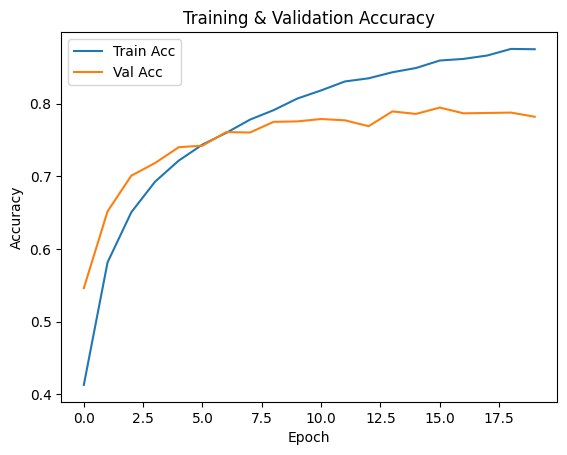

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Normalize pixel values (0-1) and one-hot encode labels
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 4. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train model
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

# 6. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n Test Accuracy: {test_acc:.4f}")

# 7. Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
